# Running on a real IBM QC device 

## 1. Making the QC

In [1]:
from qiskit import *

In [2]:
%matplotlib inline

In [3]:
q=QuantumRegister(2)
c=ClassicalRegister(2)

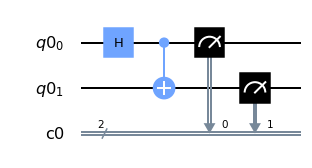

In [15]:
qc=QuantumCircuit(q,c)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.measure(q,c)
qc.draw('mpl')

In [5]:
from qiskit.tools.monitor import job_monitor

## 2. Loading the IBM account in order to communicate

In [7]:
IBMQ.load_account()

C:\Users\deathstroke\.conda\envs\13aug_tf-gpu-cuda8\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
provider=IBMQ.get_provider('ibm-q')

## 3. Sending the QC and executing the circuit 

In [18]:
backend=provider.get_backend('ibmq_5_yorktown') #since it doesn't have a queue
job=execute(qc,backend)
job_monitor(job)

Job Status: job has successfully run


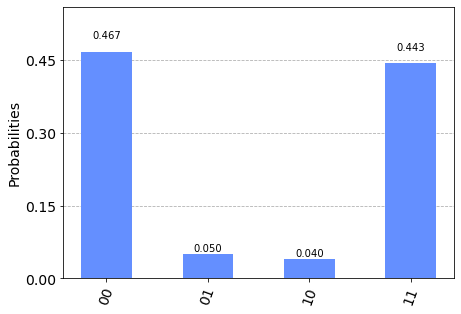

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())